In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
mpl.rcParams['image.cmap'] = 'jet'

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


Dice

In [7]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

(998, 998)


Jaccard disimilarity

In [8]:
matrix_jaccard_dis = 1 -matrix_jaccard
print(matrix_jaccard_dis.shape)

(998, 998)


In [9]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

In [10]:
# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

In [11]:
# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

# SVD

In [12]:
n_eigenvalues = 3

## word2vec

In [13]:
Uw2v, sw2v, Vw2v = np.linalg.svd(matrix_word2vec, full_matrices=False)
sw2v_sorted = sw2v.argsort()[::-1]

n_sw2v = n_eigenvalues
sw2v = np.diag(sw2v[:n_sw2v])
matrix_word2vec_ = np.dot(Uw2v[:,:n_sw2v], np.dot(sw2v, Vw2v[:n_sw2v,:]))

## jaccard

In [14]:
Ujs, sjs, Vjs = np.linalg.svd(matrix_jaccard, full_matrices=False)
sjs_sorted = sjs.argsort()[::-1]

n_sjs = n_eigenvalues
sjs = np.diag(sjs[:n_sjs])
matrix_jaccard_ = np.dot(Ujs[:,:n_sjs], np.dot(sjs, Vjs[:n_sjs,:]))

## dice

In [15]:
Uds, sds, Vds = np.linalg.svd(matrix_dice, full_matrices=False)
sds_sorted = sds.argsort()[::-1]

n_sds = n_eigenvalues
sds = np.diag(sds[:n_sds])
matrix_dice_ = np.dot(Uds[:,:n_sds], np.dot(sds, Vds[:n_sds,:]))

## word2vec arranged by eigenvalues

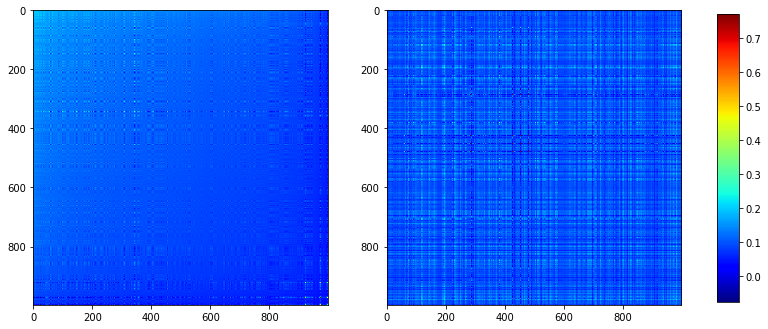

In [16]:
# Sorted by eigenvalues
# word2vec 
plt.subplot(121)
plt.imshow(matrix_word2vec_[:, word2vec_ordered_indices][word2vec_ordered_indices,:])
# word2vec with n_eigenvalues eigenvalues
plt.subplot(122)
plt.imshow(matrix_word2vec_[:, sw2v_sorted][sw2v_sorted,:])

plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

## jaccard arranged by eigenvalues

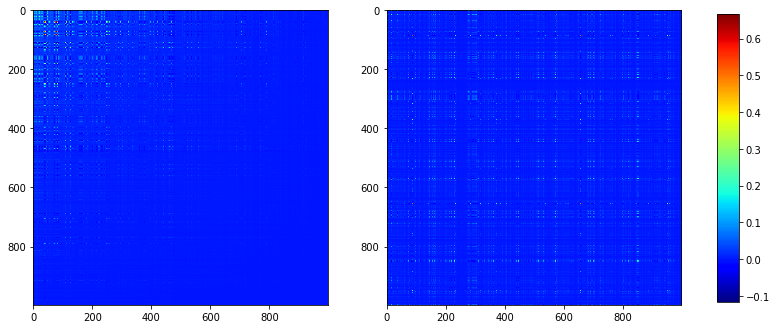

In [17]:
# Sorted by eigenvalues

# jaccard 
plt.subplot(121)
plt.imshow(matrix_jaccard_[:, jaccard_ordered_indices][jaccard_ordered_indices,:])

# jaccard with n_eigenvalues eigenvalues
plt.subplot(122)
plt.imshow(matrix_jaccard_[:, sjs_sorted][sjs_sorted,:])


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

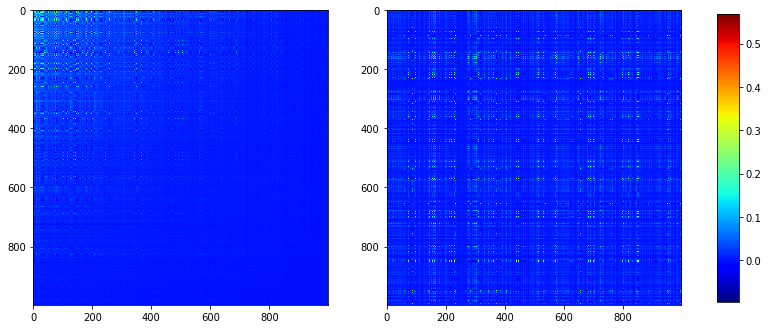

In [18]:
# Sorted by eigenvalues

# dice 
plt.subplot(121)
plt.imshow(matrix_dice_[:, dice_ordered_indices][dice_ordered_indices,:])

# dice with n_eigenvalues eigenvalues
plt.subplot(122)
plt.imshow(matrix_dice_[:, sds_sorted][sds_sorted,:])


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

## Comparison of the arrangement with eigenvalues

Only smallest values are arranged differently.

In [19]:
arrange_correspondency_w2v = []
arrange_correspondency_dice = []
for i,e in enumerate(sjs_sorted):
    arrange_correspondency_w2v.append( 1 if sw2v_sorted[i] == e else 0)
    arrange_correspondency_dice.append( 1 if sds_sorted[i] == e else 0)

print(len(list(filter(lambda x: x == 1, arrange_correspondency_w2v))))
print(len(list(filter(lambda x: x == 1, arrange_correspondency_dice))))

973
977


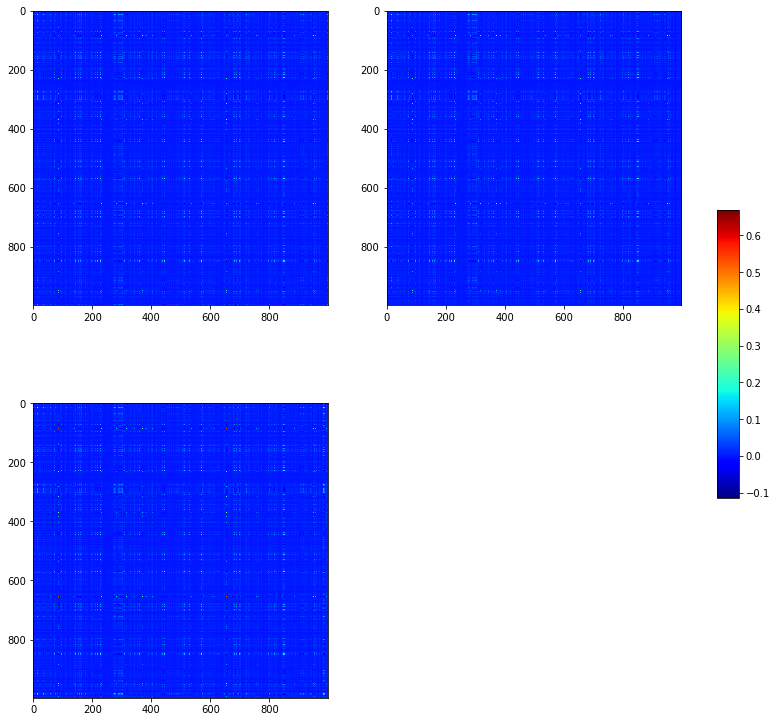

In [20]:
plt.subplot(221)
plt.imshow(matrix_jaccard_[:, sjs_sorted][sjs_sorted,:])

plt.subplot(222)
plt.imshow(matrix_jaccard_[:, sw2v_sorted][sw2v_sorted,:])

plt.subplot(223)
plt.imshow(matrix_jaccard_[:, sds_sorted][sds_sorted,:])


plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()

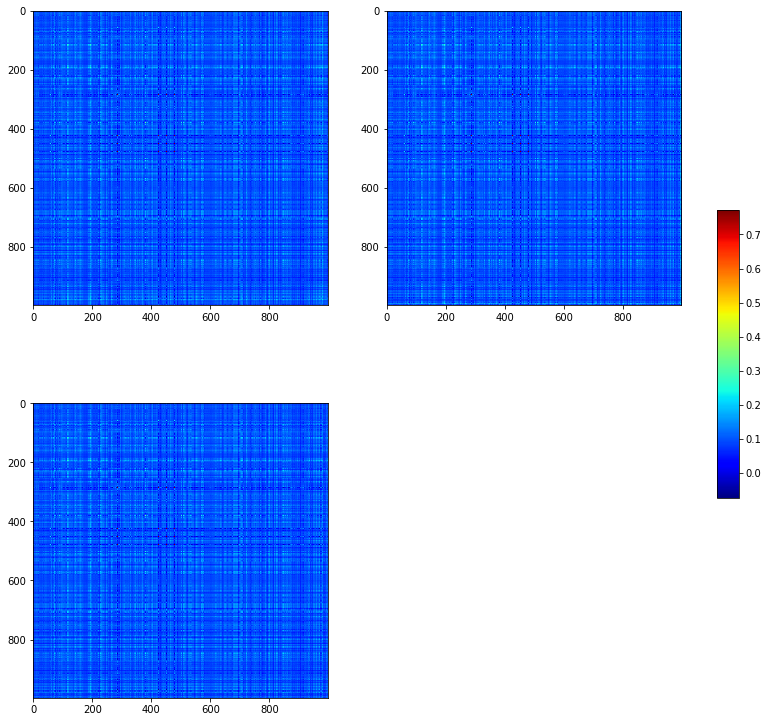

In [21]:
plt.subplot(221)
plt.imshow(matrix_word2vec_[:, sw2v_sorted][sw2v_sorted,:])

plt.subplot(222)
plt.imshow(matrix_word2vec_[:, sjs_sorted][sjs_sorted,:])

plt.subplot(223)
plt.imshow(matrix_word2vec_[:, sds_sorted][sds_sorted,:])

plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()